In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [3]:
train_data.shape,test_data.shape

((891, 12), (418, 11))

In [4]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_data.Ticket.nunique()      

681

<AxesSubplot:>

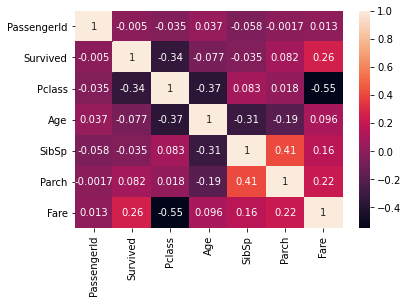

In [8]:
sns.heatmap(train_data.corr(),annot=True)

In [9]:
    train_data.duplicated().sum()

0

In [10]:
test_data.duplicated().sum()

0

<AxesSubplot:>

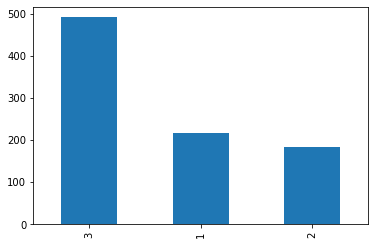

In [11]:
train_data['Pclass'].value_counts().plot(kind = "bar")

<AxesSubplot:>

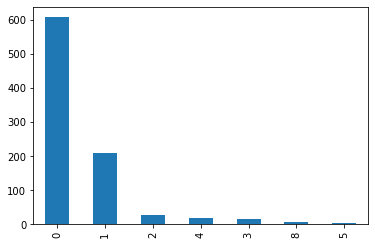

In [12]:
train_data['SibSp'].value_counts().plot(kind = "bar")

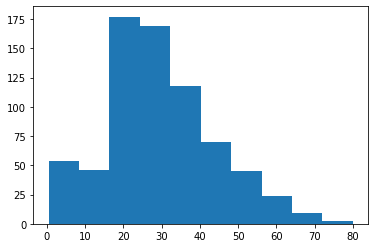

In [13]:
plt.hist(train_data["Age"])
plt.show()

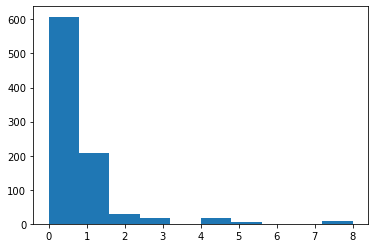

In [14]:
plt.hist(train_data["SibSp"])
plt.show()

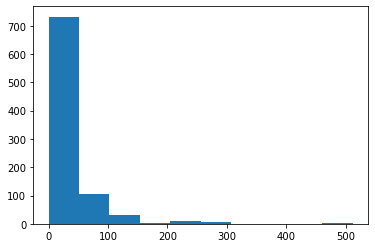

In [15]:
plt.hist(train_data["Fare"])
plt.show()

In [16]:
train_data.pivot_table(values="Age", index = "Survived",aggfunc='mean')

,Age
Survived,
0,30.626179
1,28.343690


In [17]:
train_data.pivot_table(values="Age", index = "Survived",columns="Pclass",aggfunc='count')

Pclass,1,2,3
Survived,,,
0,64,90,270
1,122,83,85


In [18]:
train_data.pivot_table(values="Age", index = "Survived",columns="Sex",aggfunc='count')

Sex,female,male
Survived,,
0,64,360
1,197,93


In [19]:
train_data.pivot_table(values="Fare", index = "Survived", aggfunc='median')

,Fare
Survived,
0,10.5
1,26.0


In [20]:
train_data["data"]="train"
test_data["data"]="test"

In [21]:
full_data=pd.concat([train_data,test_data])

In [22]:
full_data.shape

(1309, 13)

In [23]:
full_data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
data              0
dtype: int64

In [24]:
full_data["title"]=full_data["Name"].apply(lambda x : x.split(',')[1].split('.')[0].strip())

In [25]:
full_data["title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Ms                2
Mlle              2
the Countess      1
Don               1
Capt              1
Sir               1
Dona              1
Jonkheer          1
Lady              1
Mme               1
Name: title, dtype: int64

In [26]:
full_data["title"].nunique()

18

In [27]:
full_data["title"].isna().sum()

0

In [28]:
a=full_data[full_data["data"]=='train'] 
a.pivot_table(values="Age", index = "title",columns="Survived",aggfunc='count')

Survived,0.0,1.0
title,,
Capt,1.0,NaN
Col,1.0,1.0
Don,1.0,NaN
Dr,3.0,3.0
Jonkheer,1.0,NaN
Lady,NaN,1.0
Major,1.0,1.0
Master,15.0,21.0
Miss,41.0,105.0


In [29]:
title_cnt=full_data["title"].value_counts()

In [30]:
title_cnt_less_than_4=  title_cnt[title_cnt<=4]
title_cnt_less_than_4

Col             4
Major           2
Ms              2
Mlle            2
the Countess    1
Don             1
Capt            1
Sir             1
Dona            1
Jonkheer        1
Lady            1
Mme             1
Name: title, dtype: int64

In [31]:
full_data["title"]=full_data["title"].apply(lambda x : 'other' if x in title_cnt_less_than_4 else x )

In [32]:
full_data["title"].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      18
Rev         8
Dr          8
Name: title, dtype: int64

In [33]:
#data["Item_Weight"] = data.groupby("Item_Identifier").Item_Weight.transform(lambda x: x.fillna(x.mean()))
full_data["Age"] = full_data.groupby("title").Age.transform(lambda x: x.fillna(x.median()))

In [34]:
full_data["Fare"] = full_data.groupby("Pclass").Fare.transform(lambda x: x.fillna(x.mean()))

In [35]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  data         1309 non-null   object 
 13  title        1309 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 153.4+ KB


In [36]:
full_data.dropna(subset=["Embarked"],inplace=True)

In [37]:
full_data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
data              0
title             0
dtype: int64

In [38]:
full_data["Pclass"]=full_data.Pclass.astype(str)

<AxesSubplot:>

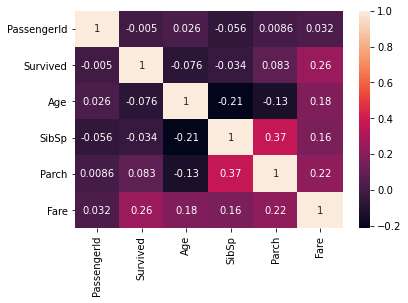

In [39]:
sns.heatmap(full_data.select_dtypes(include = np.number).corr(), annot=True)

In [40]:
del full_data["Cabin"]
del full_data["Ticket"]
del full_data["Name"]

In [41]:
full_data = full_data.reset_index().drop(columns="index")

In [42]:
numeric_data_columns = full_data.select_dtypes(include = np.number).drop(columns = ["Survived","PassengerId"]).columns

In [43]:
category_data_columns = full_data.select_dtypes(exclude = np.number).drop(columns=["data"]).columns
category_data_columns

Index(['Pclass', 'Sex', 'Embarked', 'title'], dtype='object')

In [44]:
preprocess_category_data_columns = pd.get_dummies(full_data[category_data_columns])


In [45]:
scaler = StandardScaler()

In [46]:
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(full_data[numeric_data_columns]), columns=numeric_data_columns)

In [47]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, full_data[["Survived","PassengerId","data"]]], axis = 1)

In [48]:
train_preprocessed = final_preprocessed[final_preprocessed["data"]=="train"]

In [49]:
test_preprocessed = final_preprocessed[final_preprocessed["data"]=="test"]

In [50]:
model = LogisticRegression()

In [51]:
train_preprocessed.columns

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'title_Dr', 'title_Master',
       'title_Miss', 'title_Mr', 'title_Mrs', 'title_Rev', 'title_other',
       'Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'PassengerId', 'data'],
      dtype='object')

In [52]:
X = train_preprocessed.drop(columns=["Survived","PassengerId","data"])

In [53]:
y = train_preprocessed["Survived"]

In [54]:
model.fit(X,y)

LogisticRegression()

In [55]:
X_test = test_preprocessed.drop(columns=["Survived","PassengerId","data"])

In [56]:
y_pred = model.predict(X_test)

In [57]:
y_pred

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [58]:
test_preprocessed["Survived"] = y_pred

<ipython-input-58-0a980b2a1334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_preprocessed["Survived"] = y_pred


In [59]:
submit=test_preprocessed[['PassengerId','Survived']]

In [60]:
submit["Survived"]=submit.Survived.astype(int)

<ipython-input-60-66fbc0157847>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit["Survived"]=submit.Survived.astype(int)


In [61]:
submit.head()

,PassengerId,Survived
889,892,0
890,893,1
891,894,0
892,895,0
893,896,1


In [62]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 889 to 1306
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 8.2 KB


In [63]:
submit.to_csv("liogistic_regression_result.csv", index = False)

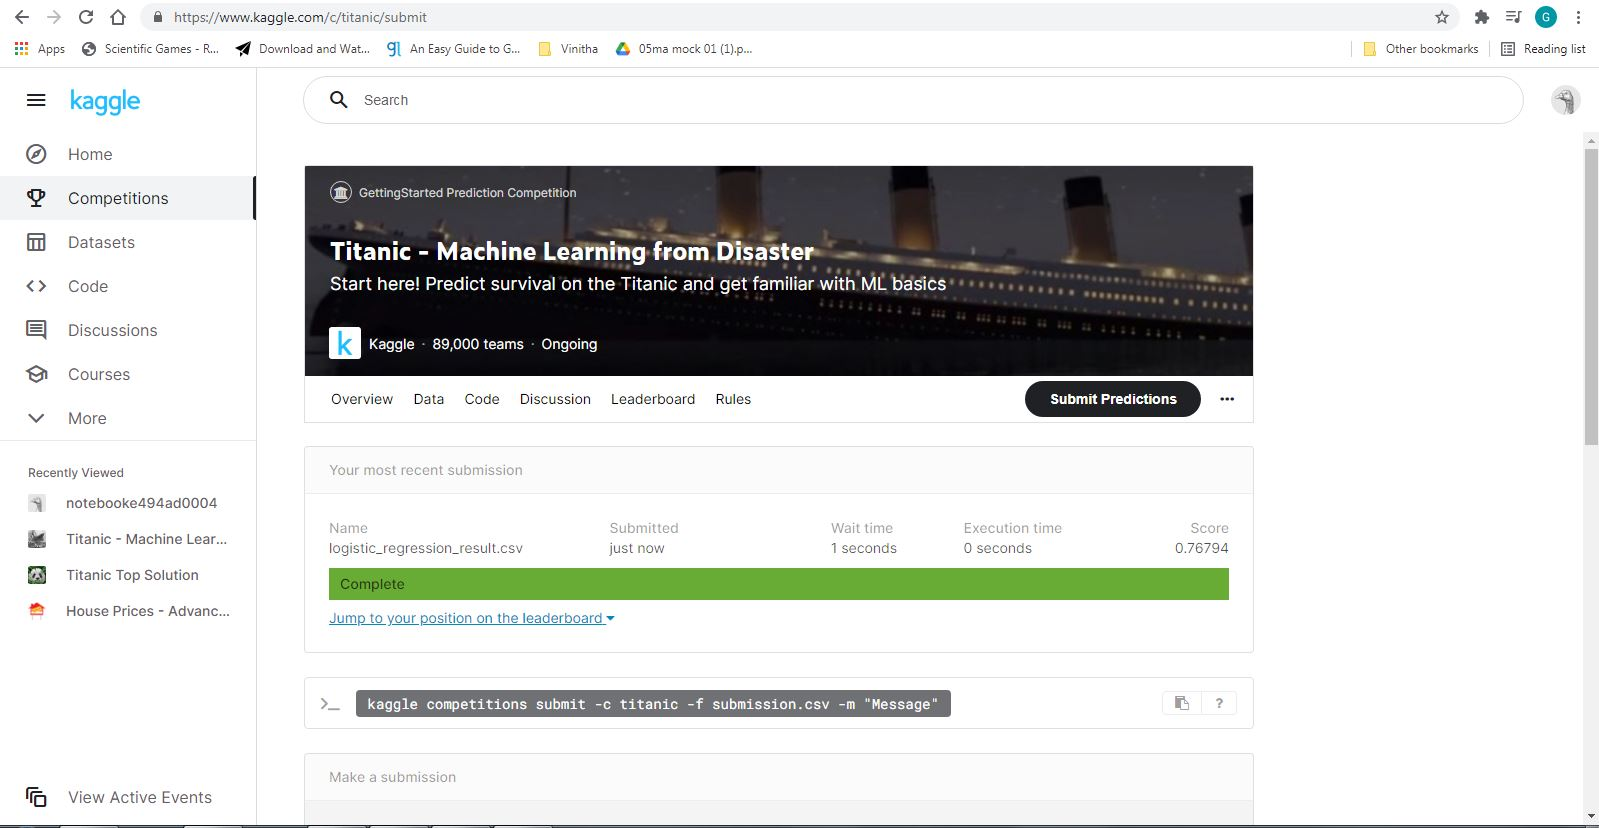

In [64]:
from IPython.display import Image
Image(filename='Score.JPG')